In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
character = pd.read_csv("dc-wikia-data.csv")
character.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [19]:
character["ID"].value_counts() 

ID
Public Identity     2466
Secret Identity     2408
Identity Unknown       9
Name: count, dtype: int64

In [23]:
character["ALIGN"].value_counts() 

ALIGN
Bad Characters        2895
Good Characters       2832
Neutral Characters     565
Reformed Criminals       3
Name: count, dtype: int64

In [32]:
character.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   ID                4883 non-null   object 
 3   ALIGN             6295 non-null   object 
 4   EYE               3268 non-null   object 
 5   HAIR              4622 non-null   object 
 6   SEX               6771 non-null   object 
 7   GSM               64 non-null     object 
 8   ALIVE             6893 non-null   object 
 9   APPEARANCES       6541 non-null   float64
 10  FIRST APPEARANCE  6827 non-null   object 
 11  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 646.6+ KB


In [33]:
character.describe() # sayısal veriler üzerinde hesaplamalar

,page_id,APPEARANCES,YEAR
count,6896.000000,6541.000000,6827.000000
mean,147441.209252,23.625134,1989.766662
std,108388.631149,87.378509,16.824194
min,1380.000000,1.000000,1935.000000
25%,44105.500000,2.000000,1983.000000
50%,141267.000000,6.000000,1992.000000
75%,213203.000000,15.000000,2003.000000
max,404010.000000,3093.000000,2013.000000


In [34]:
character.isnull().any() # boş değer var mı yok mu kontrol

page_id             False
name                False
ID                   True
ALIGN                True
EYE                  True
HAIR                 True
SEX                  True
GSM                  True
ALIVE                True
APPEARANCES          True
FIRST APPEARANCE     True
YEAR                 True
dtype: bool

In [45]:
character["name"].value_counts() 

name
Batman (Bruce Wayne)          1
Split (New Earth)             1
Shellshock (New Earth)        1
Scatter (New Earth)           1
Rumble II (New Earth)         1
                             ..
Tiger (New Earth)             1
Oblivion (New Earth)          1
Mitchell Black (New Earth)    1
Lourdes Lucero (New Earth)    1
Mookie (New Earth)            1
Name: count, Length: 6896, dtype: int64

In [59]:
property1 = character.groupby("YEAR")[["APPEARANCES"]].sum().reset_index()  #APPEARANCES:Karakterin çizgi romanlarda görünme sayısı 
property1

,YEAR,APPEARANCES
0,1935.0,125.0
1,1936.0,240.0
2,1937.0,458.0
3,1938.0,1639.0
4,1939.0,4067.0
...,...,...
74,2009.0,1378.0
75,2010.0,1008.0
76,2011.0,483.0
77,2012.0,17.0


In [56]:
character["APPEARANCES"].max()

3093.0

In [57]:
character["APPEARANCES"].min()

1.0

In [67]:
character.groupby(["EYE","HAIR"]).count().reset_index()

,EYE,HAIR,page_id,name,urlslug,ID,ALIGN,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Amber Eyes,Black Hair,2,2,2,2,2,2,0,2,2,2,2
1,Amber Eyes,Brown Hair,2,2,2,2,1,2,0,2,2,2,2
2,Black Eyes,Black Hair,169,169,169,161,157,168,3,169,164,168,168
3,Black Eyes,Blond Hair,14,14,14,14,14,14,0,14,14,14,14
4,Black Eyes,Blue Hair,2,2,2,2,2,2,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Yellow Eyes,Grey Hair,2,2,2,2,2,2,0,2,2,2,2
119,Yellow Eyes,Orange Hair,4,4,4,4,4,4,0,4,4,4,4
120,Yellow Eyes,Purple Hair,1,1,1,1,1,1,0,1,1,1,1
121,Yellow Eyes,Red Hair,5,5,5,2,5,5,0,5,4,5,5


In [68]:
character.groupby(["EYE","HAIR"])["APPEARANCES"].count().reset_index()

,EYE,HAIR,APPEARANCES
0,Amber Eyes,Black Hair,2
1,Amber Eyes,Brown Hair,2
2,Black Eyes,Black Hair,164
3,Black Eyes,Blond Hair,14
4,Black Eyes,Blue Hair,2
...,...,...,...
118,Yellow Eyes,Grey Hair,2
119,Yellow Eyes,Orange Hair,4
120,Yellow Eyes,Purple Hair,1
121,Yellow Eyes,Red Hair,4


In [69]:
character.tail()


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6895,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [71]:
sonuc =character.groupby(["SEX"])["ALIGN"].count().reset_index() #align karakter yaşıyor mu yaşamıyor mu sonucunu verir
sonuc

,SEX,ALIGN
0,Female Characters,1747
1,Genderless Characters,20
2,Male Characters,4427
3,Transgender Characters,1


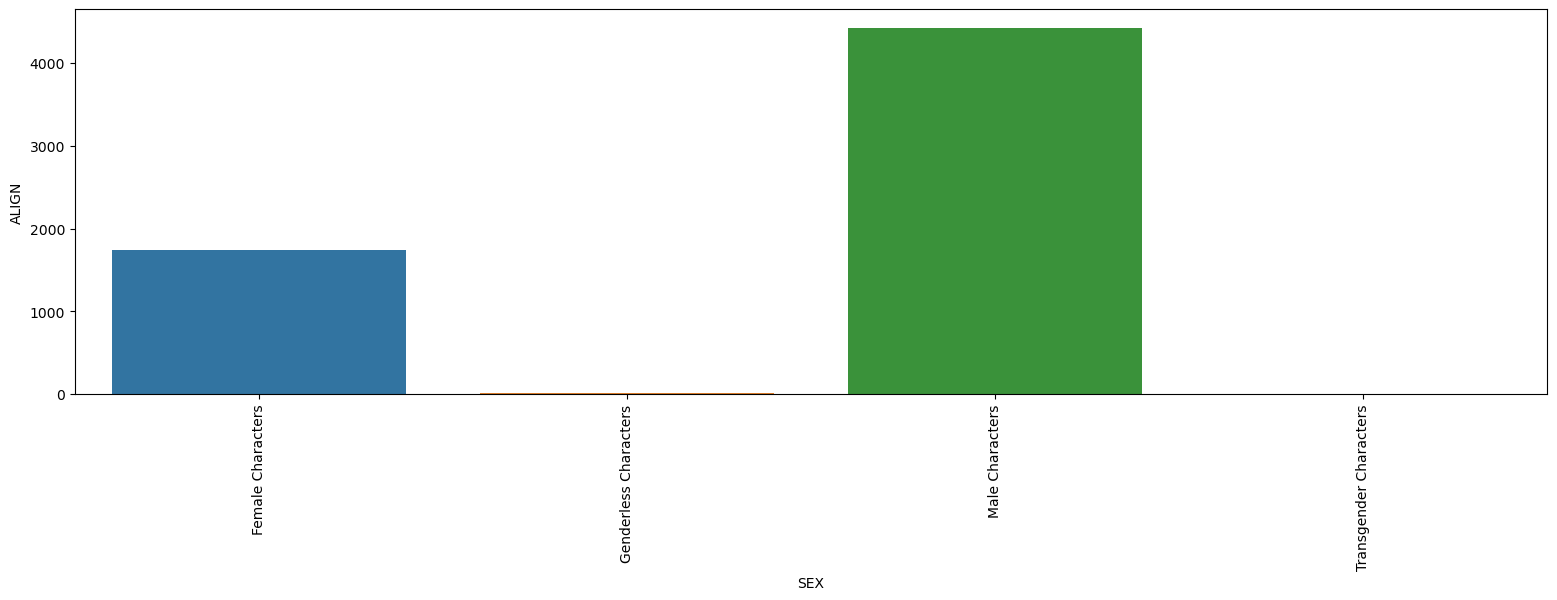

In [74]:
plt.figure(figsize=(19,5))
sns.barplot( x = "SEX", y = "ALIGN", data =sonuc)
plt.xticks(rotation=90);